In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib import rcParams
from matplotlib import colors
from helita.sim import rh15d
import os
import xarray as xr
from scipy.integrate.quadrature import cumtrapz
from scipy.interpolate import interp1d
import astropy.constants as const
from helita.utils.utilsmath import planck, voigt
rcParams['text.usetex'] = True
rcParams['text.latex.unicode'] = True
rcParams['font.family'] = 'serif'
import scipy.io
import h5py
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

C=np.array([[83,188,208],[84,188,207],[86,189,206],[87,189,204],[89,190,203],[91,190,202],[92,191,201],[94,191,200],[95,191,198],[97,192,197],[99,192,196],[100,193,195],[102,193,194],[103,194,193],[105,194,191],[106,195,190],[108,195,189],[110,196,188],[111,196,187],[113,197,186],[114,197,184],[116,197,183],[118,198,182],[119,198,181],[121,199,180],[122,199,178],[124,200,177],[126,200,176],[127,201,175],[129,201,174],[130,202,173],[132,202,171],[133,203,170],[135,203,169],[137,203,168],[138,204,167],[140,204,166],[141,205,164],[143,205,163],[145,206,162],[146,206,161],[148,207,160],[149,207,158],[151,208,157],[153,208,156],[154,209,155],[156,209,154],[157,209,153],[159,210,151],[160,210,150],[162,211,149],[164,211,148],[165,212,147],[167,212,146],[168,213,144],[170,213,143],[172,214,142],[173,214,141],[175,214,140],[176,215,138],[178,215,137],[180,216,136],[181,216,135],[183,217,134],[184,217,133],[185,217,133],[186,217,133],[187,217,133],[189,217,133],[190,217,133],[191,216,133],[192,216,134],[193,216,134],[194,216,134],[195,216,134],[196,216,134],[197,216,134],[199,216,134],[200,215,134],[201,215,134],[202,215,134],[203,215,134],[204,215,134],[205,215,135],[206,215,135],[207,215,135],[208,214,135],[210,214,135],[211,214,135],[212,214,135],[213,214,135],[214,214,135],[215,214,135],[216,214,135],[217,213,135],[218,213,136],[219,213,136],[221,213,136],[222,213,136],[223,213,136],[224,213,136],[225,213,136],[226,213,136],[227,212,136],[228,212,136],[229,212,136],[231,212,136],[232,212,137],[233,212,137],[234,212,137],[235,212,137],[236,211,137],[237,211,137],[238,211,137],[239,211,137],[240,211,137],[242,211,137],[243,211,137],[244,211,138],[245,210,138],[246,210,138],[247,210,138],[248,210,138],[249,210,138],[250,210,138],[251,210,138],[253,210,138],[254,209,138],[254,209,138],[254,208,137],[254,207,137],[253,206,136],[253,205,135],[253,204,134],[252,203,134],[252,202,133],[252,201,132],[252,200,131],[251,199,131],[251,198,130],[251,197,129],[250,196,129],[250,196,128],[250,195,127],[250,194,126],[249,193,126],[249,192,125],[249,191,124],[249,190,123],[248,189,123],[248,188,122],[248,187,121],[247,186,121],[247,185,120],[247,184,119],[247,183,118],[246,182,118],[246,181,117],[246,180,116],[245,179,115],[245,178,115],[245,177,114],[245,176,113],[244,175,113],[244,174,112],[244,173,111],[243,173,110],[243,172,110],[243,171,109],[243,170,108],[242,169,107],[242,168,107],[242,167,106],[242,166,105],[241,165,105],[241,164,104],[241,163,103],[240,162,102],[240,161,102],[240,160,101],[240,159,100],[239,158,99],[239,157,99],[239,156,98],[238,155,97],[238,154,97],[238,153,96],[238,152,95],[237,151,94],[237,151,94],[237,150,93],[237,149,92],[236,147,91],[236,145,90],[236,144,89],[236,142,88],[236,140,86],[236,139,85],[236,137,84],[236,135,83],[236,133,82],[236,132,81],[236,130,79],[236,128,78],[236,127,77],[236,125,76],[236,123,75],[236,121,74],[236,120,72],[236,118,71],[236,116,70],[236,115,69],[236,113,68],[236,111,67],[236,109,65],[236,108,64],[236,106,63],[236,104,62],[235,103,61],[235,101,60],[235,99,58],[235,98,57],[235,96,56],[235,94,55],[235,92,54],[235,91,53],[235,89,52],[235,87,50],[235,86,49],[235,84,48],[235,82,47],[235,80,46],[235,79,45],[235,77,43],[235,75,42],[235,74,41],[235,72,40],[235,70,39],[235,68,38],[235,67,36],[235,65,35],[235,63,34],[235,62,33],[235,60,32],[235,58,31],[235,57,29],[234,55,28],[234,53,27],[234,51,26],[234,50,25],[234,48,24],[234,46,22],[234,45,21],[234,43,20],[234,41,19],[234,39,18]])
my_rainbow = colors.ListedColormap(C/255.0)

data = rh15d.Rh15dout('/Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/UVB_test_nov_re/output')
intensity = data.ray.intensity

data_13 = rh15d.Rh15dout('/Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/UVB_test2/output')
intensity_13 = data_13.ray.intensity

intensity[13,0] = intensity_13[0,0]


--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/UVB_test_nov_re/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/UVB_test_nov_re/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/UVB_test_nov_re/output/output_ray.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/UVB_test2/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/UVB_test2/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/UVB_test2/output/output_ray.hdf5 file.


/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)
/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simu

In [40]:
wvl_mg = scipy.io.readsav('./sav/MgIIk4fig2.sav')['wvl']
int_mg = scipy.io.readsav('./sav/MgIIk4fig2.sav')['int'][346,:]
int_ha = scipy.io.readsav('./sav/data1fig2.sav')['int_ha_sel']
wvl_ha = np.array([-1.,-0.8,-0.6,-0.4,-0.2,0.0,0.2,0.4,0.6,0.8,1.0])

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


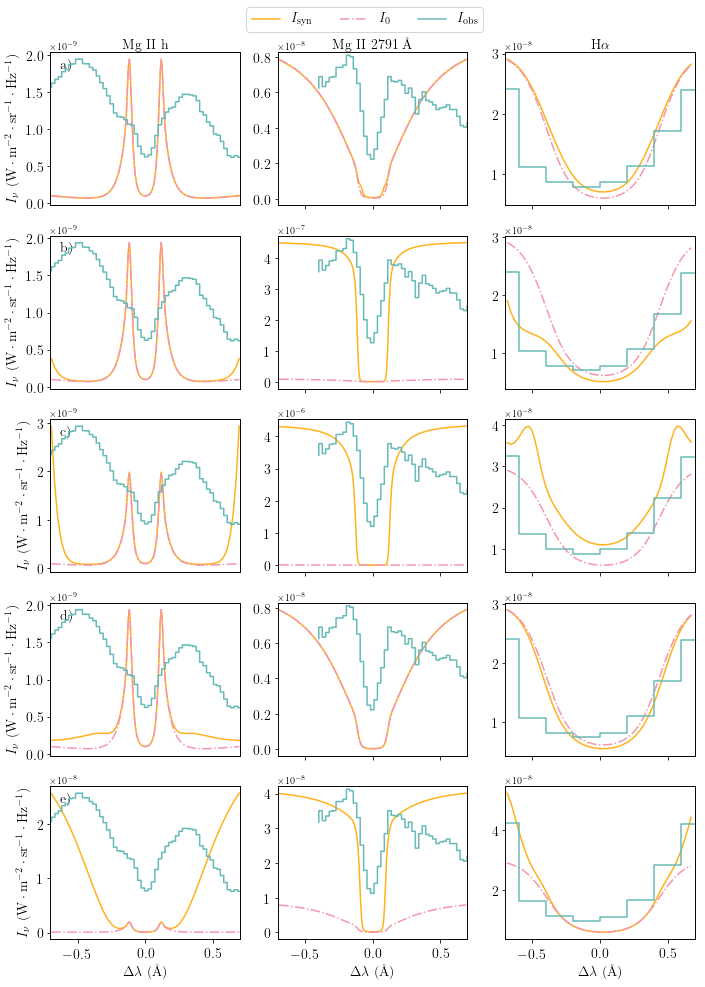

In [52]:
panel = ['a) ','b)', 'c) ','d) ','e) ']

colors = ['#FFB11B','#F596AA','#66BAB7']

fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(5,3,figsize=(10,14))

intensity_grid = [(ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)]
ratio = np.ones(15)

sta_wvl = [1.e7/35669.312,1.e7/(71491.062-35669.312),656.467]
wvl_wing = 0.07
intensity_sel = [intensity.sel(wavelength=slice(sta_wvl_ - wvl_wing,sta_wvl_ + wvl_wing)) for sta_wvl_ in sta_wvl]

for intensity_ax_ in [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12]:
    intensity_ax_.xaxis.set_major_formatter(ticker.NullFormatter())
    
for intensity_ax_ in [ax1,ax4,ax7,ax10]:
    intensity_ax_.get_xaxis().set_visible(False)

for ax_ in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15]:
    ax1.get_shared_x_axes().join(ax1, ax_)

formatter = ticker.ScalarFormatter() #scientific formatting
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))


ax1.set_xlim(-0.7,0.7) 
#ax1.set_ylim(4000,1e4)

#ax3.set_ylim(-5,15)


for ii, axs_ in enumerate(intensity_grid):
    
    axs_[0].plot((intensity_sel[0][ii,0].coords['wavelength']-sta_wvl[0])*10,intensity_sel[0][ii,0],color=colors[0])
    axs_[0].plot((intensity_sel[0][15,0].coords['wavelength']-sta_wvl[0])*10,intensity_sel[0][15,0],color=colors[1],ls='-.')
    
    axs_obs0 = axs_[0].twinx()
    axs_obs0.get_xaxis().set_visible(False)
    axs_obs0.get_yaxis().set_visible(False)
    axs_obs0.step(wvl_mg-sta_wvl[0]*10,int_mg,color=colors[2],ls='--')
    
    axs_[1].plot((intensity_sel[1][ii,0].coords['wavelength']-sta_wvl[1])*10,intensity_sel[1][ii,0],color=colors[0])
    axs_[1].plot((intensity_sel[1][15,0].coords['wavelength']-sta_wvl[1])*10,intensity_sel[1][15,0],color=colors[1],ls='-.')
    
    axs_obs1 = axs_[1].twinx()
    axs_obs1.get_xaxis().set_visible(False)
    axs_obs1.get_yaxis().set_visible(False)
    axs_obs1.step(wvl_mg-sta_wvl[1]*10,int_mg,color=colors[2],ls='--')
    axs_obs1.set_ylim(0,50)
    
    ln1, = axs_[2].plot((intensity_sel[2][ii,0].coords['wavelength']-sta_wvl[2])*10,intensity_sel[2][ii,0],color=colors[0],
                        label = r'$I_{\mathrm{syn}}$')
    ln2, = axs_[2].plot((intensity_sel[2][15,0].coords['wavelength']-sta_wvl[2])*10,intensity_sel[2][15,0],color=colors[1],ls='-.',
                       label = r'$I_0$')

    axs_obs2 = axs_[2].twinx()
    axs_obs2.get_xaxis().set_visible(False)
    axs_obs2.get_yaxis().set_visible(False)
    ln3, = axs_obs2.step(wvl_ha,int_ha,color=colors[2],ls='--',label = r'$I_{\mathrm{obs}}$')
    axs_obs2.set_ylim(0,0.4)
    
    
    grid_title = panel[ii]
    axs_[0].set_title(grid_title,position=(0.05,0.85),loc='left',fontsize=14)
    
    
    for ax_ in axs_:
        ax_.tick_params(labelsize=14)
        ax_.xaxis.set_major_locator(ticker.MaxNLocator(3))
        ax_.yaxis.set_major_formatter(formatter)
    
for ax_ in [ax13,ax14,ax15]:
    ax_.set_xlabel(r'$\Delta \lambda\ (\mathrm{\AA})$',fontsize = 14)

for ax_ in [ax1,ax4,ax7,ax10,ax13]:
    ax_.set_ylabel(r'$I_\nu\ (\mathrm{W\cdot m^{-2}\cdot sr^{-1} \cdot Hz^{-1}})$',fontsize = 14)
    

leg = [ln1,ln2,ln3]
ax1.legend(leg,[leg_.get_label() for leg_ in leg],bbox_to_anchor=(0.32,1.24,2,.102),ncol=6,fontsize=14)  
ax1.text(0.5, 1.05, r'Mg II h', horizontalalignment='center',
    verticalalignment='center', transform=ax1.transAxes,fontsize=14)  
ax2.text(0.5, 1.05, r'Mg II 2791 \mbox{\AA}', horizontalalignment='center',
    verticalalignment='center', transform=ax2.transAxes,fontsize=14) 
ax3.text(0.5, 1.05, r'H$\alpha$', horizontalalignment='center',
    verticalalignment='center', transform=ax3.transAxes,fontsize=14) 
plt.subplots_adjust(bottom = 0.05,left=0.08,right=0.975,top=0.93)
plt.savefig(fname = '../figs/UVB_spec_1.eps', dpi = 300, format = 'eps')


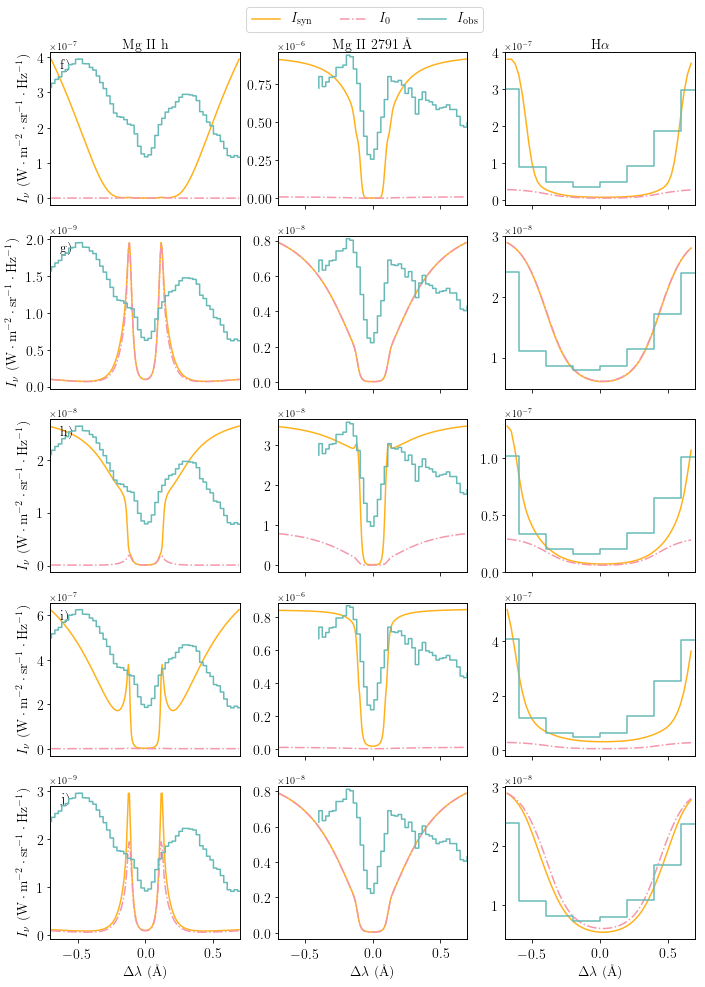

In [54]:
panel = ['a) ','b)', 'c) ','d) ','e)',
        'f) ', 'g) ','h) ','i) ','j) ',
        'k) ', 'l) ','m) ', 'n) ', 'o) ']

colors = ['#FFB11B','#F596AA','#66BAB7']

fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(5,3,figsize=(10,14))

intensity_grid = [(ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)]
ratio = np.ones(15)

sta_wvl = [1.e7/35669.312,1.e7/(71491.062-35669.312),656.467]
wvl_wing = 0.07
intensity_sel = [intensity.sel(wavelength=slice(sta_wvl_ - wvl_wing,sta_wvl_ + wvl_wing)) for sta_wvl_ in sta_wvl]

for intensity_ax_ in [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12]:
    intensity_ax_.xaxis.set_major_formatter(ticker.NullFormatter())
    
for intensity_ax_ in [ax1,ax4,ax7,ax10]:
    intensity_ax_.get_xaxis().set_visible(False)

for ax_ in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15]:
    ax1.get_shared_x_axes().join(ax1, ax_)

formatter = ticker.ScalarFormatter() #scientific formatting
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))


ax1.set_xlim(-0.7,0.7) 
#ax1.set_ylim(4000,1e4)

#ax3.set_ylim(-5,15)


for ii, axs_ in enumerate(intensity_grid):
    
    axs_[0].plot((intensity_sel[0][ii+5,0].coords['wavelength']-sta_wvl[0])*10,intensity_sel[0][ii+5,0],color=colors[0])
    axs_[0].plot((intensity_sel[0][15,0].coords['wavelength']-sta_wvl[0])*10,intensity_sel[0][15,0],color=colors[1],ls='-.')
    
    axs_obs0 = axs_[0].twinx()
    axs_obs0.get_xaxis().set_visible(False)
    axs_obs0.get_yaxis().set_visible(False)
    axs_obs0.step(wvl_mg-sta_wvl[0]*10,int_mg,color=colors[2],ls='--')
    
    axs_[1].plot((intensity_sel[1][ii+5,0].coords['wavelength']-sta_wvl[1])*10,intensity_sel[1][ii+5,0],color=colors[0])
    axs_[1].plot((intensity_sel[1][15,0].coords['wavelength']-sta_wvl[1])*10,intensity_sel[1][15,0],color=colors[1],ls='-.')
    
    axs_obs1 = axs_[1].twinx()
    axs_obs1.get_xaxis().set_visible(False)
    axs_obs1.get_yaxis().set_visible(False)
    axs_obs1.step(wvl_mg-sta_wvl[1]*10,int_mg,color=colors[2],ls='--')
    axs_obs1.set_ylim(0,50)
    
    ln1, = axs_[2].plot((intensity_sel[2][ii+5,0].coords['wavelength']-sta_wvl[2])*10,intensity_sel[2][ii+5,0],color=colors[0],
                        label = r'$I_{\mathrm{syn}}$')
    ln2, = axs_[2].plot((intensity_sel[2][15,0].coords['wavelength']-sta_wvl[2])*10,intensity_sel[2][15,0],color=colors[1],ls='-.',
                       label = r'$I_0$')

    axs_obs2 = axs_[2].twinx()
    axs_obs2.get_xaxis().set_visible(False)
    axs_obs2.get_yaxis().set_visible(False)
    ln3, = axs_obs2.step(wvl_ha,int_ha,color=colors[2],ls='--',label = r'$I_{\mathrm{obs}}$')
    axs_obs2.set_ylim(0,0.4)
    
    
    grid_title = panel[ii+5]
    axs_[0].set_title(grid_title,position=(0.05,0.85),loc='left',fontsize=14)
    
    
    for ax_ in axs_:
        ax_.tick_params(labelsize=14)
        ax_.xaxis.set_major_locator(ticker.MaxNLocator(3))
        ax_.yaxis.set_major_formatter(formatter)
    
for ax_ in [ax13,ax14,ax15]:
    ax_.set_xlabel(r'$\Delta \lambda\ (\mathrm{\AA})$',fontsize = 14)

for ax_ in [ax1,ax4,ax7,ax10,ax13]:
    ax_.set_ylabel(r'$I_\nu\ (\mathrm{W\cdot m^{-2}\cdot sr^{-1} \cdot Hz^{-1}})$',fontsize = 14)
    

leg = [ln1,ln2,ln3]
ax1.legend(leg,[leg_.get_label() for leg_ in leg],bbox_to_anchor=(0.32,1.24,2,.102),ncol=6,fontsize=14)  
ax1.text(0.5, 1.05, r'Mg II h', horizontalalignment='center',
    verticalalignment='center', transform=ax1.transAxes,fontsize=14)  
ax2.text(0.5, 1.05, r'Mg II 2791 \mbox{\AA}', horizontalalignment='center',
    verticalalignment='center', transform=ax2.transAxes,fontsize=14) 
ax3.text(0.5, 1.05, r'H$\alpha$', horizontalalignment='center',
    verticalalignment='center', transform=ax3.transAxes,fontsize=14) 
plt.subplots_adjust(bottom = 0.05,left=0.08,right=0.975,top=0.93)
plt.savefig(fname = '../figs/UVB_spec_2.eps', dpi = 300, format = 'eps')


/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1725: UserWarning: Saw kwargs ['ls', 'linestyle'] which are all aliases for 'linestyle'.  Kept value from 'linestyle'
  seen=seen, canon=canonical, used=seen[-1]))


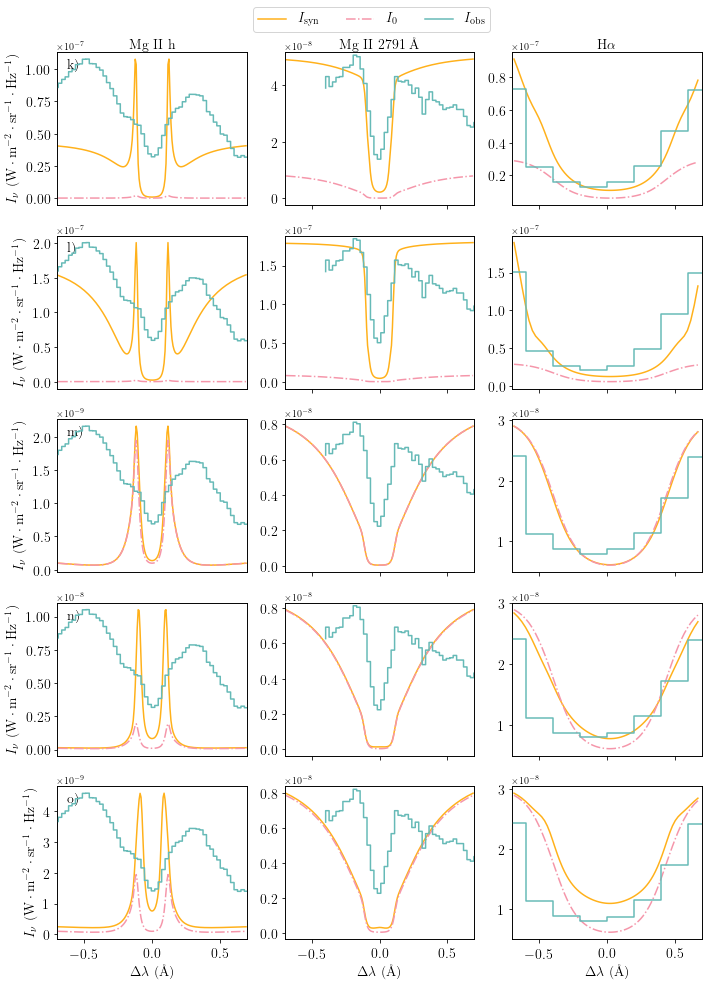

In [56]:
panel = ['a) ','b)', 'c) ','d) ','e)',
        'f) ', 'g) ','h) ','i) ','j) ',
        'k) ', 'l) ','m) ', 'n) ', 'o) ']

colors = ['#FFB11B','#F596AA','#66BAB7']

fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(5,3,figsize=(10,14))

intensity_grid = [(ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)]
ratio = np.ones(15)

sta_wvl = [1.e7/35669.312,1.e7/(71491.062-35669.312),656.467]
wvl_wing = 0.07
intensity_sel = [intensity.sel(wavelength=slice(sta_wvl_ - wvl_wing,sta_wvl_ + wvl_wing)) for sta_wvl_ in sta_wvl]

for intensity_ax_ in [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12]:
    intensity_ax_.xaxis.set_major_formatter(ticker.NullFormatter())
    
for intensity_ax_ in [ax1,ax4,ax7,ax10]:
    intensity_ax_.get_xaxis().set_visible(False)

for ax_ in [ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15]:
    ax1.get_shared_x_axes().join(ax1, ax_)

formatter = ticker.ScalarFormatter() #scientific formatting
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))


ax1.set_xlim(-0.7,0.7) 
#ax1.set_ylim(4000,1e4)

#ax3.set_ylim(-5,15)


for ii, axs_ in enumerate(intensity_grid):
    
    axs_[0].plot((intensity_sel[0][ii+10,0].coords['wavelength']-sta_wvl[0])*10,intensity_sel[0][ii+10,0],color=colors[0])
    axs_[0].plot((intensity_sel[0][15,0].coords['wavelength']-sta_wvl[0])*10,intensity_sel[0][15,0],color=colors[1],ls='-.')
    
    axs_obs0 = axs_[0].twinx()
    axs_obs0.get_xaxis().set_visible(False)
    axs_obs0.get_yaxis().set_visible(False)
    axs_obs0.step(wvl_mg-sta_wvl[0]*10,int_mg,color=colors[2],ls='--')
    
    axs_[1].plot((intensity_sel[1][ii+10,0].coords['wavelength']-sta_wvl[1])*10,intensity_sel[1][ii+10,0],color=colors[0])
    axs_[1].plot((intensity_sel[1][15,0].coords['wavelength']-sta_wvl[1])*10,intensity_sel[1][15,0],color=colors[1],ls='-.')
    
    axs_obs1 = axs_[1].twinx()
    axs_obs1.get_xaxis().set_visible(False)
    axs_obs1.get_yaxis().set_visible(False)
    axs_obs1.step(wvl_mg-sta_wvl[1]*10,int_mg,color=colors[2],ls='--')
    axs_obs1.set_ylim(0,50)
    
    ln1, = axs_[2].plot((intensity_sel[2][ii+10,0].coords['wavelength']-sta_wvl[2])*10,intensity_sel[2][ii+10,0],color=colors[0],
                        label = r'$I_{\mathrm{syn}}$')
    ln2, = axs_[2].plot((intensity_sel[2][15,0].coords['wavelength']-sta_wvl[2])*10,intensity_sel[2][15,0],color=colors[1],ls='-.',
                       label = r'$I_0$')

    axs_obs2 = axs_[2].twinx()
    axs_obs2.get_xaxis().set_visible(False)
    axs_obs2.get_yaxis().set_visible(False)
    ln3, = axs_obs2.step(wvl_ha,int_ha,color=colors[2],ls='--',label = r'$I_{\mathrm{obs}}$')
    axs_obs2.set_ylim(0,0.4)
    
    
    grid_title = panel[ii+10]
    axs_[0].set_title(grid_title,position=(0.05,0.85),loc='left',fontsize=14)
    
    
    for ax_ in axs_:
        ax_.tick_params(labelsize=14)
        ax_.xaxis.set_major_locator(ticker.MaxNLocator(3))
        ax_.yaxis.set_major_formatter(formatter)
    
for ax_ in [ax13,ax14,ax15]:
    ax_.set_xlabel(r'$\Delta \lambda\ (\mathrm{\AA})$',fontsize = 14)

for ax_ in [ax1,ax4,ax7,ax10,ax13]:
    ax_.set_ylabel(r'$I_\nu\ (\mathrm{W\cdot m^{-2}\cdot sr^{-1} \cdot Hz^{-1}})$',fontsize = 14)
    

leg = [ln1,ln2,ln3]
ax1.legend(leg,[leg_.get_label() for leg_ in leg],bbox_to_anchor=(0.32,1.24,2,.102),ncol=6,fontsize=14)  
ax1.text(0.5, 1.05, r'Mg II h', horizontalalignment='center',
    verticalalignment='center', transform=ax1.transAxes,fontsize=14)  
ax2.text(0.5, 1.05, r'Mg II 2791 \mbox{\AA}', horizontalalignment='center',
    verticalalignment='center', transform=ax2.transAxes,fontsize=14) 
ax3.text(0.5, 1.05, r'H$\alpha$', horizontalalignment='center',
    verticalalignment='center', transform=ax3.transAxes,fontsize=14) 
plt.subplots_adjust(bottom = 0.05,left=0.08,right=0.975,top=0.93)
plt.savefig(fname = '../figs/UVB_spec_3.eps', dpi = 300, format = 'eps')


In [ ]:
        'k) ', 'l) ','m) ', 'n) ', 'o) ']

/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  self.ray = xr.open_dataset(infile, autoclose=True)
/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use

--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F12_d3_Ec85_v5_Mg/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F12_d3_Ec85_v5_Mg/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F12_d3_Ec85_v5_Mg/output/output_ray.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F12_d3_Ec150_v5_Mg/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F12_d3_Ec150_v5_Mg/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F12_d3_Ec150_v5_Mg/output/output_ray.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F12_d3_Ec200_v5_Mg/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F12_d3_Ec200_v5_Mg/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F12_d3_Ec200_v5_Mg/output

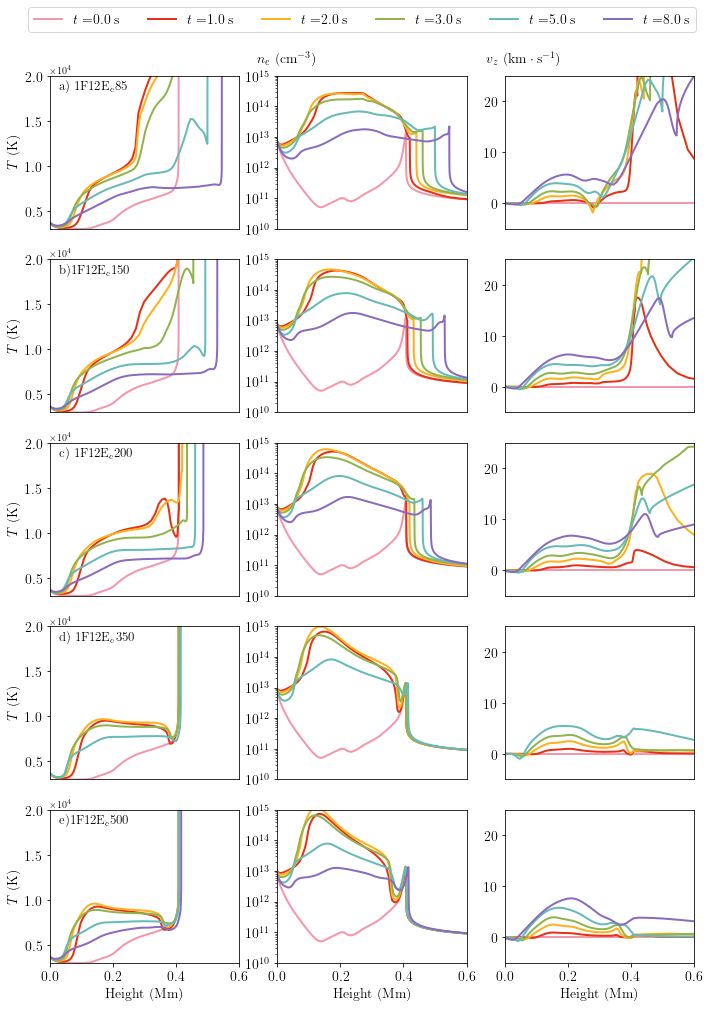

In [27]:
B_Params = [('12','85'),('12','150'),('12','200'),('12','350'),('12','500')]
panel = ['a) ','b)', 'c) ','d) ','e)',
        'f) ', 'g) ','h) ','i) ','j) ',
        'k) ', 'l) ','m) ', 'n)', 'o)']
colors = ['#F596AA','#E83015','#FFB11B','#90B44B','#66BAB7','#8A6BBE']
t_steps = [0,5,10,15,25,40]
labels = [r'$t=0.0\ \mathrm{s}$',r'$t=2.6\ \mathrm{s}$',r'$t=6.3\ \mathrm{s}$',r'$t=7.4\ \mathrm{s}$',r'$t=8.28\ \mathrm{s}$',r'$t=10.20\ \mathrm{s}$',
         r'$t=23.53\ \mathrm{s}$']
intensity_grid_label = r'$\mathrm{C\ II\ 1334}$'
leg = []
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(5,3,figsize=(10,14))

intensity_grid = [(ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)]

for intensity_ax_ in [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12]:
    intensity_ax_.get_xaxis().set_visible(False)
    
for intensity_ax_ in [ax1,ax4,ax7,ax10]:
    intensity_ax_.get_xaxis().set_visible(False)
 
ax1.get_shared_x_axes().join(ax1, ax2)
ax1.get_shared_x_axes().join(ax1, ax3)

for intensity_ax_grid_ in intensity_grid[1:]:
    ax1.get_shared_x_axes().join(ax1, intensity_ax_grid_[0])
    ax1.get_shared_y_axes().join(ax1, intensity_ax_grid_[0])
    ax2.get_shared_x_axes().join(ax2, intensity_ax_grid_[1])
    ax2.get_shared_y_axes().join(ax2, intensity_ax_grid_[1])
    ax3.get_shared_x_axes().join(ax3, intensity_ax_grid_[2])
    ax3.get_shared_y_axes().join(ax3, intensity_ax_grid_[2])
    

formatter = ticker.ScalarFormatter() #scientific formatting
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))


ax1.set_xlim(0,0.6) 
ax1.set_ylim(3000,2e4)
ax2.set_ylim(1e10,1e15)
ax2.set_yscale('log')
ax3.set_ylim(-5,25)

for ax_ in [ax1,ax4,ax7,ax10,ax13]:
    ax_.yaxis.set_major_formatter(formatter)

for ii,B_Params_ in enumerate(B_Params):
    atmos_filename = '/Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/Atmos/dMe/F'+B_Params_[0]+'_d3_Ec'+B_Params_[1]+'_tv15.hdf5'
    data_filename = '/Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F'+B_Params_[0]+'_d3_Ec'+B_Params_[1]+'_v5_Mg/output'
    data_atmos = h5py.File(atmos_filename,'r')
    data = rh15d.Rh15dout(data_filename)
    height_out = data.atmos.height_scale
    height = data_atmos['z'].value
    temperature = data.atmos.temperature
    electron_density = data_atmos['electron_density'].value
    velocity_z = data_atmos['velocity_z'].value
    
    timet = data_atmos['timet'].value
    timet = data_atmos['timet'].value
    if ii!=3:
        timet_c = [timet[step_c] for step_c in t_steps]
    else:
        timet_c = [timet[step_c] for step_c in t_steps[:-1]]
    timet_step = [r'$t = $'+"{:.1f}".format(timet_)+r' s' for timet_ in timet_c]
        
    if ii !=3:
        for jj,step_ in enumerate(t_steps):
            height_t_index = len(height_out[step_,0].dropna('height'))
            height_i = height[0,step_,0,-height_t_index:]/1e6
            height_ii = height[0,step_,0,:]/1e6
            electron_density_i = electron_density[0,step_,0,:]
            velocity_z_i = velocity_z[0,step_,0,:]/1e3
            
            if ii == 0:
                ln, = intensity_grid[ii][0].plot(height_i,temperature[step_,0].dropna('height'),color=colors[jj],
                                                 linewidth=2,label = timet_step[jj])
                intensity_grid[ii][1].plot(height_ii,electron_density_i/1e6,color=colors[jj],linewidth=2,label = timet_step[jj])
                
                intensity_grid[ii][2].plot(height_ii,velocity_z_i,color=colors[jj],linewidth=2,label=labels[ii])
                leg.append(ln)
            else:
                intensity_grid[ii][0].plot(height_i,temperature[step_,0].dropna('height'),color=colors[jj],
                                                 linewidth=2)
                intensity_grid[ii][1].plot(height_ii,electron_density_i/1e6,color=colors[jj],linewidth=2)
                
                intensity_grid[ii][2].plot(height_ii,velocity_z_i,color=colors[jj],linewidth=2)
    else:
        for jj,step_ in enumerate(t_steps[:-1]):
            height_t_index = len(height_out[step_,0].dropna('height'))
            height_i = height[0,step_,0,-height_t_index:]/1e6
            height_ii = height[0,step_,0,:]/1e6
            electron_density_i = electron_density[0,step_,0,:]
            velocity_z_i = velocity_z[0,step_,0,:]/1e3
            
            if ii == 0:
                ln, = intensity_grid[ii][0].plot(height_i,temperature[step_,0].dropna('height'),color=colors[jj],
                                                 linewidth=2,label = timet_step[jj])
                intensity_grid[ii][1].plot(height_ii,electron_density_i/1e6,color=colors[jj],linewidth=2,label = timet_step[jj])
                
                intensity_grid[ii][2].plot(height_ii,velocity_z_i,color=colors[jj],linewidth=2,label=labels[ii])
                leg.append(ln)
            else:
                intensity_grid[ii][0].plot(height_i,temperature[step_,0].dropna('height'),color=colors[jj],
                                                 linewidth=2)
                intensity_grid[ii][1].plot(height_ii,electron_density_i/1e6,color=colors[jj],linewidth=2)
                
                intensity_grid[ii][2].plot(height_ii,velocity_z_i,color=colors[jj],linewidth=2)
    
    grid_title = panel[ii] + r'$\mathrm{1F' + B_Params[ii][0] + r'E_c' +B_Params[ii][1] +r'}$'
    intensity_grid[ii][0].set_title(grid_title,position=(0.05,0.85),loc='left',fontsize=13)
    intensity_grid[ii][0].tick_params(labelsize=14)
    intensity_grid[ii][1].tick_params(labelsize=14)
    intensity_grid[ii][2].tick_params(labelsize=14)
    #del im

    
for ax_ in [ax13,ax14,ax15]:
    ax_.set_xlabel(r'Height (Mm)',fontsize = 14)

for ax_ in [ax1,ax4,ax7,ax10,ax13]:
    ax_.set_ylabel(r'$T$ (K)',fontsize = 14)

ax2.text(0.05, 1.1, r'$n_e$ ($\mathrm{cm^{-3}}$)', horizontalalignment='center',
    verticalalignment='center', transform=ax2.transAxes,fontsize=14)    
ax3.text(0.1, 1.1, r'$v_z$ ($\mathrm{km\cdot s^{-1}}$)', horizontalalignment='center',
    verticalalignment='center', transform=ax3.transAxes,fontsize=14) 

ax1.legend(leg,[leg_.get_label() for leg_ in leg],bbox_to_anchor=(-0.15,1.24,2,.102),ncol=6,fontsize=14)  
plt.subplots_adjust(bottom = 0.05,left=0.08,right=0.975,top=0.93)
plt.savefig(fname = '../figs/dMe_atoms_2.eps', dpi = 300, format = 'eps')


/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:40: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  setattr(self, g, xr.open_dataset(infile, group=g, autoclose=True))
/Users/yjzhu/.local/lib/python3.7/site-packages/helita-0.9.0-py3.7-macosx-10.9-x86_64.egg/helita/sim/rh15d.py:53: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in xarray v0.12. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  self.ray = xr.open_dataset(infile, autoclose=True)
/anaconda3/lib/python3.7/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use

--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F13_d3_Ec85_v5_Mg/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F13_d3_Ec85_v5_Mg/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F13_d3_Ec85_v5_Mg/output/output_ray.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F13_d3_Ec150_v5_Mg/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F13_d3_Ec150_v5_Mg/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F13_d3_Ec150_v5_Mg/output/output_ray.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F13_d3_Ec200_v5_Mg/output/output_aux.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F13_d3_Ec200_v5_Mg/output/output_indata.hdf5 file.
--- Read /Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F13_d3_Ec200_v5_Mg/output

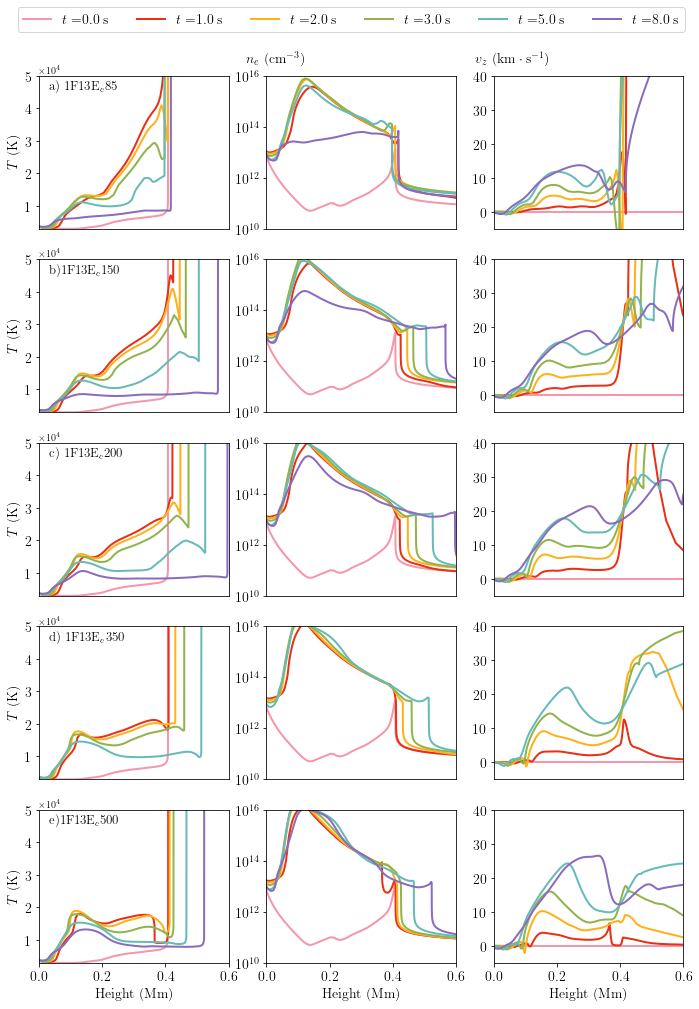

In [31]:
B_Params = [('13','85'),('13','150'),('13','200'),('13','350'),('13','500')]
panel = ['a) ','b)', 'c) ','d) ','e)',
        'f) ', 'g) ','h) ','i) ','j) ',
        'k) ', 'l) ','m) ', 'n)', 'o)']
colors = ['#F596AA','#E83015','#FFB11B','#90B44B','#66BAB7','#8A6BBE']
t_steps = [0,5,10,15,25,40]
labels = [r'$t=0.0\ \mathrm{s}$',r'$t=2.6\ \mathrm{s}$',r'$t=6.3\ \mathrm{s}$',r'$t=7.4\ \mathrm{s}$',r'$t=8.28\ \mathrm{s}$',r'$t=10.20\ \mathrm{s}$',
         r'$t=23.53\ \mathrm{s}$']
intensity_grid_label = r'$\mathrm{C\ II\ 1334}$'
leg = []
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)) = plt.subplots(5,3,figsize=(10,14))

intensity_grid = [(ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12),(ax13,ax14,ax15)]

for intensity_ax_ in [ax2,ax3,ax5,ax6,ax8,ax9,ax11,ax12]:
    intensity_ax_.get_xaxis().set_visible(False)
    
for intensity_ax_ in [ax1,ax4,ax7,ax10]:
    intensity_ax_.get_xaxis().set_visible(False)
 
ax1.get_shared_x_axes().join(ax1, ax2)
ax1.get_shared_x_axes().join(ax1, ax3)

for intensity_ax_grid_ in intensity_grid[1:]:
    ax1.get_shared_x_axes().join(ax1, intensity_ax_grid_[0])
    ax1.get_shared_y_axes().join(ax1, intensity_ax_grid_[0])
    ax2.get_shared_x_axes().join(ax2, intensity_ax_grid_[1])
    ax2.get_shared_y_axes().join(ax2, intensity_ax_grid_[1])
    ax3.get_shared_x_axes().join(ax3, intensity_ax_grid_[2])
    ax3.get_shared_y_axes().join(ax3, intensity_ax_grid_[2])
    

formatter = ticker.ScalarFormatter() #scientific formatting
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))


ax1.set_xlim(0,0.6) 
ax1.set_ylim(3000,5e4)
ax2.set_ylim(1e10,1e16)
ax2.set_yscale('log')
ax3.set_ylim(-5,40)

for ax_ in [ax1,ax4,ax7,ax10,ax13]:
    ax_.yaxis.set_major_formatter(formatter)

for ii,B_Params_ in enumerate(B_Params):
    atmos_filename = '/Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/Atmos/dMe/F'+B_Params_[0]+'_d3_Ec'+B_Params_[1]+'_tv15.hdf5'
    data_filename = '/Users/yjzhu/Desktop/Solar/Num/rh15d_mgf_test/rh15d/dMe_F'+B_Params_[0]+'_d3_Ec'+B_Params_[1]+'_v5_Mg/output'
    data_atmos = h5py.File(atmos_filename,'r')
    data = rh15d.Rh15dout(data_filename)
    height_out = data.atmos.height_scale
    height = data_atmos['z'].value
    temperature = data.atmos.temperature
    electron_density = data_atmos['electron_density'].value
    velocity_z = data_atmos['velocity_z'].value
    
    timet = data_atmos['timet'].value
    timet = data_atmos['timet'].value
    if ii!=3:
        timet_c = [timet[step_c] for step_c in t_steps]
    else:
        timet_c = [timet[step_c] for step_c in t_steps[:-1]]
    timet_step = [r'$t = $'+"{:.1f}".format(timet_)+r' s' for timet_ in timet_c]
        
    if ii !=3:
        for jj,step_ in enumerate(t_steps):
            height_t_index = len(height_out[step_,0].dropna('height'))
            height_i = height[0,step_,0,-height_t_index:]/1e6
            height_ii = height[0,step_,0,:]/1e6
            electron_density_i = electron_density[0,step_,0,:]
            velocity_z_i = velocity_z[0,step_,0,:]/1e3
            
            if ii == 0:
                ln, = intensity_grid[ii][0].plot(height_i,temperature[step_,0].dropna('height'),color=colors[jj],
                                                 linewidth=2,label = timet_step[jj])
                intensity_grid[ii][1].plot(height_ii,electron_density_i/1e6,color=colors[jj],linewidth=2,label = timet_step[jj])
                
                intensity_grid[ii][2].plot(height_ii,velocity_z_i,color=colors[jj],linewidth=2,label=labels[ii])
                leg.append(ln)
            else:
                intensity_grid[ii][0].plot(height_i,temperature[step_,0].dropna('height'),color=colors[jj],
                                                 linewidth=2)
                intensity_grid[ii][1].plot(height_ii,electron_density_i/1e6,color=colors[jj],linewidth=2)
                
                intensity_grid[ii][2].plot(height_ii,velocity_z_i,color=colors[jj],linewidth=2)
    else:
        for jj,step_ in enumerate(t_steps[:-1]):
            height_t_index = len(height_out[step_,0].dropna('height'))
            height_i = height[0,step_,0,-height_t_index:]/1e6
            height_ii = height[0,step_,0,:]/1e6
            electron_density_i = electron_density[0,step_,0,:]
            velocity_z_i = velocity_z[0,step_,0,:]/1e3
            
            if ii == 0:
                ln, = intensity_grid[ii][0].plot(height_i,temperature[step_,0].dropna('height'),color=colors[jj],
                                                 linewidth=2,label = timet_step[jj])
                intensity_grid[ii][1].plot(height_ii,electron_density_i/1e6,color=colors[jj],linewidth=2,label = timet_step[jj])
                
                intensity_grid[ii][2].plot(height_ii,velocity_z_i,color=colors[jj],linewidth=2,label=labels[ii])
                leg.append(ln)
            else:
                intensity_grid[ii][0].plot(height_i,temperature[step_,0].dropna('height'),color=colors[jj],
                                                 linewidth=2)
                intensity_grid[ii][1].plot(height_ii,electron_density_i/1e6,color=colors[jj],linewidth=2)
                
                intensity_grid[ii][2].plot(height_ii,velocity_z_i,color=colors[jj],linewidth=2)
    
    grid_title = panel[ii] + r'$\mathrm{1F' + B_Params[ii][0] + r'E_c' +B_Params[ii][1] +r'}$'
    intensity_grid[ii][0].set_title(grid_title,position=(0.05,0.85),loc='left',fontsize=13)
    intensity_grid[ii][0].tick_params(labelsize=14)
    intensity_grid[ii][1].tick_params(labelsize=14)
    intensity_grid[ii][2].tick_params(labelsize=14)
    #del im

    
for ax_ in [ax13,ax14,ax15]:
    ax_.set_xlabel(r'Height (Mm)',fontsize = 14)

for ax_ in [ax1,ax4,ax7,ax10,ax13]:
    ax_.set_ylabel(r'$T$ (K)',fontsize = 14)

ax2.text(0.05, 1.1, r'$n_e$ ($\mathrm{cm^{-3}}$)', horizontalalignment='center',
    verticalalignment='center', transform=ax2.transAxes,fontsize=14)    
ax3.text(0.1, 1.1, r'$v_z$ ($\mathrm{km\cdot s^{-1}}$)', horizontalalignment='center',
    verticalalignment='center', transform=ax3.transAxes,fontsize=14) 

ax1.legend(leg,[leg_.get_label() for leg_ in leg],bbox_to_anchor=(-0.15,1.24,2,.102),ncol=6,fontsize=14)  
plt.subplots_adjust(bottom = 0.05,left=0.08,right=0.975,top=0.93)
plt.savefig(fname = '../figs/dMe_atoms_3.eps', dpi = 300, format = 'eps')
